## Import Libraries

In [356]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

## Load Dataset

In [357]:
df= pd.read_csv('./Data/train.csv')

## Explore Dataset

In [358]:
df

,X1,X2,X3,X4,X5,X6,X7,X8,output
0,0.63,498.55,308.70,271.7,4.5,2,0.40,5,17.15
1,0.72,432.08,360.15,181.1,8.0,2,0.10,2,42.32
2,0.58,531.79,360.15,271.7,4.5,2,0.40,4,22.35
3,0.72,432.08,360.15,181.1,8.0,2,0.25,2,45.20
4,0.75,415.46,334.43,181.1,8.0,3,0.10,5,25.53
...,...,...,...,...,...,...,...,...,...
571,0.67,465.31,257.25,271.7,4.5,3,0.10,2,14.15
572,0.82,382.22,334.43,150.9,8.0,3,0.40,2,36.47
573,0.89,348.99,308.70,135.8,8.0,3,0.40,5,34.25
574,0.58,531.79,360.15,271.7,4.5,2,0.10,4,19.84


In [359]:
df.shape

(576, 9)

In [360]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      576 non-null    float64
 1   X2      576 non-null    float64
 2   X3      576 non-null    float64
 3   X4      576 non-null    float64
 4   X5      576 non-null    float64
 5   X6      576 non-null    int64  
 6   X7      576 non-null    float64
 7   X8      576 non-null    int64  
 8   output  576 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 40.6 KB


In [361]:
df.isnull().sum()

X1        0
X2        0
X3        0
X4        0
X5        0
X6        0
X7        0
X8        0
output    0
dtype: int64

In [362]:
df.isna().sum()

X1        0
X2        0
X3        0
X4        0
X5        0
X6        0
X7        0
X8        0
output    0
dtype: int64

In [363]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,output
count,576.000000,576.000000,576.0000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,0.695833,455.620833,334.4275,217.591667,6.250000,3.333333,0.234375,2.812500,25.382483
std,0.095517,59.761950,45.8187,55.686049,1.751521,1.248303,0.133250,1.551297,9.853758
min,0.570000,348.990000,257.2500,135.800000,4.500000,2.000000,0.000000,0.000000,11.250000
25%,0.622500,411.305000,308.7000,173.550000,4.500000,2.000000,0.100000,1.750000,16.110000
50%,0.680000,457.005000,334.4300,226.400000,6.250000,3.000000,0.250000,3.000000,22.700000
75%,0.757500,502.705000,360.1500,271.700000,8.000000,5.000000,0.400000,4.000000,34.155000
max,0.890000,548.410000,437.3300,271.700000,8.000000,5.000000,0.400000,5.000000,49.490000


<AxesSubplot:>

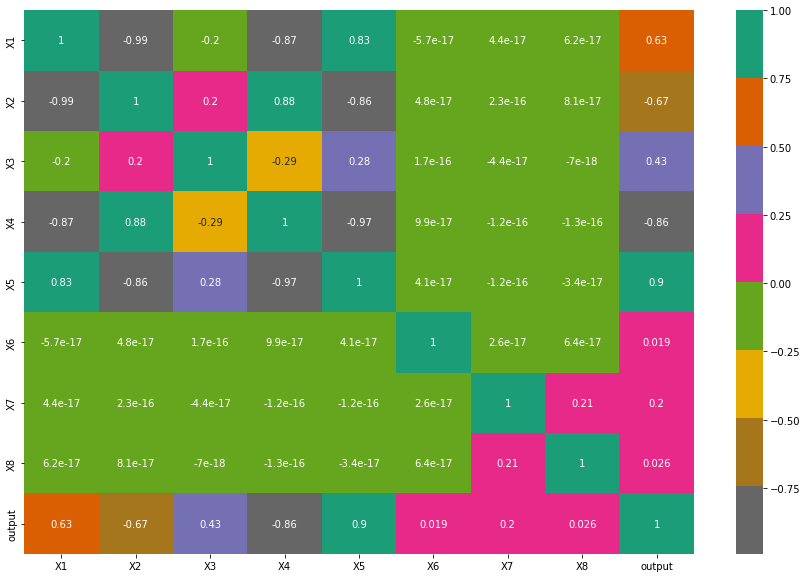

In [364]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='Dark2_r')

In [365]:
features=df.drop('output',axis=1)
output=df['output']

In [366]:
train_data,test_data,train_output,test_output = train_test_split(features,output,test_size=0.2,random_state=100)

## Decision Tree 

In [367]:
tuned_para={
    'splitter':['best', 'random'],
    'max_depth':range(3,15),
    'max_features':['auto', 'sqrt', 'log2']
}

In [368]:
reg=GridSearchCV(DecisionTreeRegressor(),tuned_para,cv=10)

In [369]:
reg.fit(train_data,train_output)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(3, 15),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [370]:
reg.best_score_

0.9568109790075419

In [371]:
reg.best_params_

{'max_depth': 7, 'max_features': 'log2', 'splitter': 'best'}

In [372]:
tree=DecisionTreeRegressor(max_depth=6,max_features='auto',splitter='random',random_state=100)

In [373]:
tree.fit(train_data,train_output)

DecisionTreeRegressor(max_depth=6, max_features='auto', random_state=100,
                      splitter='random')

In [374]:
p = tree.predict(test_data)

In [403]:
path=tree.cost_complexity_pruning_path(train_data,train_output)
alpha=path['ccp_alphas']
alpha

array([0.00000000e+00, 3.05193237e-05, 6.90657748e-05, 1.72500000e-04,
       1.83423913e-04, 3.63483437e-04, 4.00181159e-04, 4.63768116e-04,
       4.70769788e-04, 1.06889674e-03, 1.32628261e-03, 1.36148188e-03,
       1.54948478e-03, 2.24698068e-03, 2.40581633e-03, 3.10069807e-03,
       3.89971014e-03, 4.00048309e-03, 7.30537500e-03, 8.07246611e-03,
       8.39250242e-03, 9.71750000e-03, 1.32611371e-02, 2.03793439e-02,
       2.61671243e-02, 2.79210548e-02, 2.86468533e-02, 3.54566989e-02,
       3.71705797e-02, 4.56613116e-02, 4.82927189e-02, 6.15223309e-02,
       6.34205271e-02, 7.24450001e-02, 8.02087459e-02, 9.41447270e-02,
       1.04517103e-01, 1.10110306e-01, 1.10391751e-01, 1.97244557e-01,
       2.89044291e-01, 3.45389298e-01, 3.46336109e-01, 3.61482386e-01,
       4.16970594e-01, 4.27561417e-01, 5.72480799e-01, 6.39360169e-01,
       9.28026956e-01, 1.06112858e+00, 1.07379741e+00, 6.91697101e+00,
       7.96726998e+01])

## Evalution

In [375]:
mean_squared_error(p,test_output)

4.187503190434306

In [376]:
mean_absolute_error(p,test_output)

1.3805323974397248

In [377]:
r2_score(p,test_output)

0.9514700097102008

In [378]:
np.sqrt(mean_squared_error(p,test_output))

2.046338972515137

## Train the model with the testing dataset

In [380]:
test_dataset = pd.read_csv('./Data/test.csv')

In [379]:
tree.fit(features,output)

DecisionTreeRegressor(max_depth=6, max_features='auto', random_state=100,
                      splitter='random')

In [381]:
pred = tree.predict(test_dataset)

In [382]:
prediction = pd.DataFrame({'Id':range(1,193),'output':pred})

In [383]:
prediction.to_csv('./Data/prediction.csv',index=False)

## RandomForest Tree

In [384]:
tuned_para={
    'n_estimators':[30,35,40,45,50,55,60],
    'max_depth':range(3,15),
    'max_features':['auto', 'sqrt', 'log2']
}

In [385]:
forest=GridSearchCV(RandomForestRegressor(),tuned_para,cv=10)

In [386]:
forest.fit(train_data,train_output)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': range(3, 15),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [30, 35, 40, 45, 50, 55, 60]})

In [387]:
forest.best_score_

0.968009785116213

In [388]:
forest.best_estimator_

RandomForestRegressor(max_depth=10, max_features='sqrt', n_estimators=50)

In [389]:
randomForest=RandomForestRegressor(n_estimators=30, max_depth=13,max_features='sqrt')

In [390]:
randomForest.fit(train_data,train_output)

RandomForestRegressor(max_depth=13, max_features='sqrt', n_estimators=30)

In [391]:
pred=randomForest.predict(test_data)

## Evalution

In [393]:
mean_squared_error(pred,test_output)

3.009897841847591

In [394]:
mean_absolute_error(pred,test_output)

1.1713371647509576

In [395]:
r2_score(pred,test_output)

0.9652649282245304

In [396]:
np.sqrt(mean_squared_error(pred,test_output))

1.7349057155498655

## Train the model with the testing dataset

In [397]:
randomForest.fit(features,output)

RandomForestRegressor(max_depth=13, max_features='sqrt', n_estimators=30)

In [398]:
pred=randomForest.predict(test_dataset)

In [399]:
prediction = pd.DataFrame({'Id':range(1,193),'output':pred})

In [400]:
prediction.to_csv('./Data/prediction_new.csv',index=False)